In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import shapely

In [2]:
#lluvias = pd.read_excel("pre_mensual_espacial_p.xlsx")
lluvias = pd.read_excel("pre_mensual_espacial_p.xlsx",index_col=4, parse_dates=True)

In [3]:
#Datos tomados de globalclimatemonitor.org

In [4]:
lluvias

,id_punto,geom,mes,agno,p_mes,X,Y
fecha,,,,,,,
1990-01-01,49484,POINT (-8042833.209814015 1374173.3093312215),1,1990,20.4,-8.042833e+06,1.374173e+06
1990-02-01,49484,POINT (-8042833.209814015 1374173.3093312215),2,1990,18.3,-8.042833e+06,1.374173e+06
1990-03-01,49484,POINT (-8042833.209814015 1374173.3093312215),3,1990,14.2,-8.042833e+06,1.374173e+06
1990-04-01,49484,POINT (-8042833.209814015 1374173.3093312215),4,1990,27.6,-8.042833e+06,1.374173e+06
1990-05-01,49484,POINT (-8042833.209814015 1374173.3093312215),5,1990,129.3,-8.042833e+06,1.374173e+06
...,...,...,...,...,...,...,...
2022-09-01,55444,POINT (-7486235.755847648 -417746.4458894468),9,2022,75.7,-7.486236e+06,-4.177464e+05
2022-10-01,55444,POINT (-7486235.755847648 -417746.4458894468),10,2022,233.9,-7.486236e+06,-4.177464e+05
2022-11-01,55444,POINT (-7486235.755847648 -417746.4458894468),11,2022,169.6,-7.486236e+06,-4.177464e+05


In [5]:
lluvias["X"]  = lluvias.X.astype(float)

In [6]:
lluvias = lluvias.drop("geom", axis=1)
lluvias

,id_punto,mes,agno,p_mes,X,Y
fecha,,,,,,
1990-01-01,49484,1,1990,20.4,-8.042833e+06,1.374173e+06
1990-02-01,49484,2,1990,18.3,-8.042833e+06,1.374173e+06
1990-03-01,49484,3,1990,14.2,-8.042833e+06,1.374173e+06
1990-04-01,49484,4,1990,27.6,-8.042833e+06,1.374173e+06
1990-05-01,49484,5,1990,129.3,-8.042833e+06,1.374173e+06
...,...,...,...,...,...,...
2022-09-01,55444,9,2022,75.7,-7.486236e+06,-4.177464e+05
2022-10-01,55444,10,2022,233.9,-7.486236e+06,-4.177464e+05
2022-11-01,55444,11,2022,169.6,-7.486236e+06,-4.177464e+05


In [7]:
geometria = [shapely.Point(xy) for xy in zip(lluvias.X,lluvias.Y)]

In [8]:
crs = {"init":"epsg:3395"}

In [9]:
GeoLluvias = gpd.GeoDataFrame(lluvias,geometry=geometria, crs=crs)
GeoLluvias

C:\Users\valiz\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id_punto,mes,agno,p_mes,X,Y,geometry
fecha,,,,,,,
1990-01-01,49484,1,1990,20.4,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
1990-02-01,49484,2,1990,18.3,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
1990-03-01,49484,3,1990,14.2,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
1990-04-01,49484,4,1990,27.6,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
1990-05-01,49484,5,1990,129.3,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
...,...,...,...,...,...,...,...
2022-09-01,55444,9,2022,75.7,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)
2022-10-01,55444,10,2022,233.9,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)
2022-11-01,55444,11,2022,169.6,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)


In [10]:
GeoLluvias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 274401 entries, 1990-01-01 to 2023-01-01
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id_punto  274401 non-null  int64   
 1   mes       274401 non-null  int64   
 2   agno      274401 non-null  int64   
 3   p_mes     274401 non-null  float64 
 4   X         274401 non-null  float64 
 5   Y         274401 non-null  float64 
 6   geometry  274401 non-null  geometry
dtypes: float64(3), geometry(1), int64(3)
memory usage: 16.7 MB


In [11]:
#Python strftime cheat sheet --> strftime.org

In [12]:
AnualMensualLluviasPais = GeoLluvias.groupby(GeoLluvias.index.strftime("%Y")).mean()

C:\Users\valiz\AppData\Local\Temp\ipykernel_19708\3664044016.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AnualMensualLluviasPais = GeoLluvias.groupby(GeoLluvias.index.strftime("%Y")).mean()


In [13]:
AnualMensualLluviasPais

,id_punto,mes,agno,p_mes,X,Y
fecha,,,,,,
1990,52734.600289,6.500000,1990.0,184.732780,-8.080181e+06,360376.954029
1991,52734.600289,6.500000,1991.0,166.652682,-8.080181e+06,360376.954029
1992,52734.600289,6.500000,1992.0,168.828163,-8.080181e+06,360376.954029
1993,52734.600289,6.500000,1993.0,210.348052,-8.080181e+06,360376.954029
1994,52734.600289,6.500000,1994.0,211.769541,-8.080181e+06,360376.954029
1995,52734.600289,6.500000,1995.0,215.482023,-8.080181e+06,360376.954029
1996,52734.600289,6.500000,1996.0,226.394384,-8.080181e+06,360376.954029
1997,52734.600289,6.500000,1997.0,194.370430,-8.080181e+06,360376.954029
1998,52734.600289,6.500000,1998.0,219.157973,-8.080181e+06,360376.954029


<Axes: xlabel='fecha'>

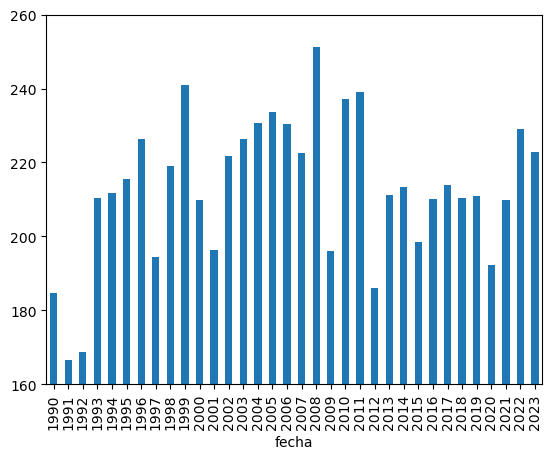

In [14]:
AnualMensualLluviasPais["p_mes"].plot(kind="bar", ylim=(160,260))

In [15]:
MensualLluviasPais = GeoLluvias.groupby(GeoLluvias.index.strftime("%Y-%m")).mean()

MensualLluviasPais

C:\Users\valiz\AppData\Local\Temp\ipykernel_19708\2634069308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MensualLluviasPais = GeoLluvias.groupby(GeoLluvias.index.strftime("%Y-%m")).mean()


,id_punto,mes,agno,p_mes,X,Y
fecha,,,,,,
1990-01,52734.600289,1.0,1990.0,148.838384,-8.080181e+06,360376.954029
1990-02,52734.600289,2.0,1990.0,125.731313,-8.080181e+06,360376.954029
1990-03,52734.600289,3.0,1990.0,135.991486,-8.080181e+06,360376.954029
1990-04,52734.600289,4.0,1990.0,221.381818,-8.080181e+06,360376.954029
1990-05,52734.600289,5.0,1990.0,251.156421,-8.080181e+06,360376.954029
...,...,...,...,...,...,...
2022-09,52734.600289,9.0,2022.0,202.927850,-8.080181e+06,360376.954029
2022-10,52734.600289,10.0,2022.0,223.817027,-8.080181e+06,360376.954029
2022-11,52734.600289,11.0,2022.0,204.102020,-8.080181e+06,360376.954029


In [16]:
MensualLluviasPais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1990-01 to 2023-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id_punto  396 non-null    float64
 1   mes       396 non-null    float64
 2   agno      396 non-null    float64
 3   p_mes     396 non-null    float64
 4   X         396 non-null    float64
 5   Y         396 non-null    float64
dtypes: float64(6)
memory usage: 21.7+ KB


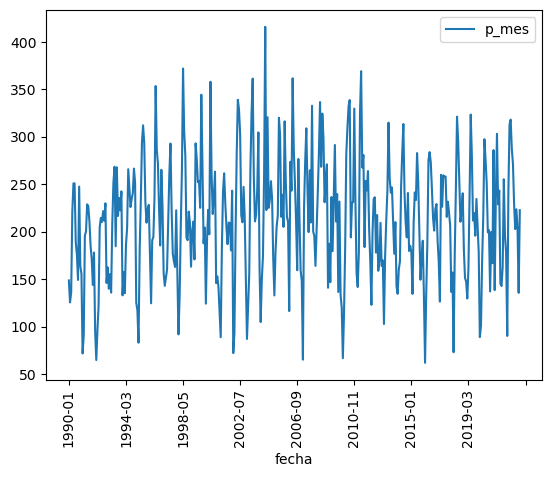

In [17]:
MensualLluviasPais.plot(y="p_mes")
plt.xticks(rotation=90)
plt.show()

In [18]:
xr_lluvias = GeoLluvias.reset_index()

In [19]:
xr_lluvias

,fecha,id_punto,mes,agno,p_mes,X,Y,geometry
0,1990-01-01,49484,1,1990,20.4,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
1,1990-02-01,49484,2,1990,18.3,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
2,1990-03-01,49484,3,1990,14.2,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
3,1990-04-01,49484,4,1990,27.6,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
4,1990-05-01,49484,5,1990,129.3,-8.042833e+06,1.374173e+06,POINT (-8042833.210 1374173.309)
...,...,...,...,...,...,...,...,...
274396,2022-09-01,55444,9,2022,75.7,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)
274397,2022-10-01,55444,10,2022,233.9,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)
274398,2022-11-01,55444,11,2022,169.6,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)
274399,2022-12-01,55444,12,2022,199.6,-7.486236e+06,-4.177464e+05,POINT (-7486235.756 -417746.446)


In [20]:
xr_lluvias = xr_lluvias.set_index(["fecha","X","Y"])

In [21]:
xr_lluvias = xr_lluvias.to_xarray()

In [22]:
xr_lluvias

<xarray.Dataset>
Dimensions:   (fecha: 396, X: 24, Y: 89)
Coordinates:
  * fecha     (fecha) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-01-01
  * X         (X) float64 -8.766e+06 -8.711e+06 ... -7.542e+06 -7.486e+06
  * Y         (Y) float64 -4.177e+05 -3.62e+05 ... 1.317e+06 1.374e+06
Data variables:
    id_punto  (fecha, X, Y) float64 5.542e+04 5.52e+04 5.5e+04 ... nan nan nan
    mes       (fecha, X, Y) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan nan nan
    agno      (fecha, X, Y) float64 1.99e+03 1.99e+03 1.99e+03 ... nan nan nan
    p_mes     (fecha, X, Y) float64 124.7 90.7 48.6 41.3 ... 20.0 nan nan nan
    geometry  (fecha, X, Y) object POINT (-8766409.89997029 -417746.445889447...

In [23]:
prec = xr_lluvias.p_mes

In [24]:
t = prec.isel(fecha=slice(6,396,12))

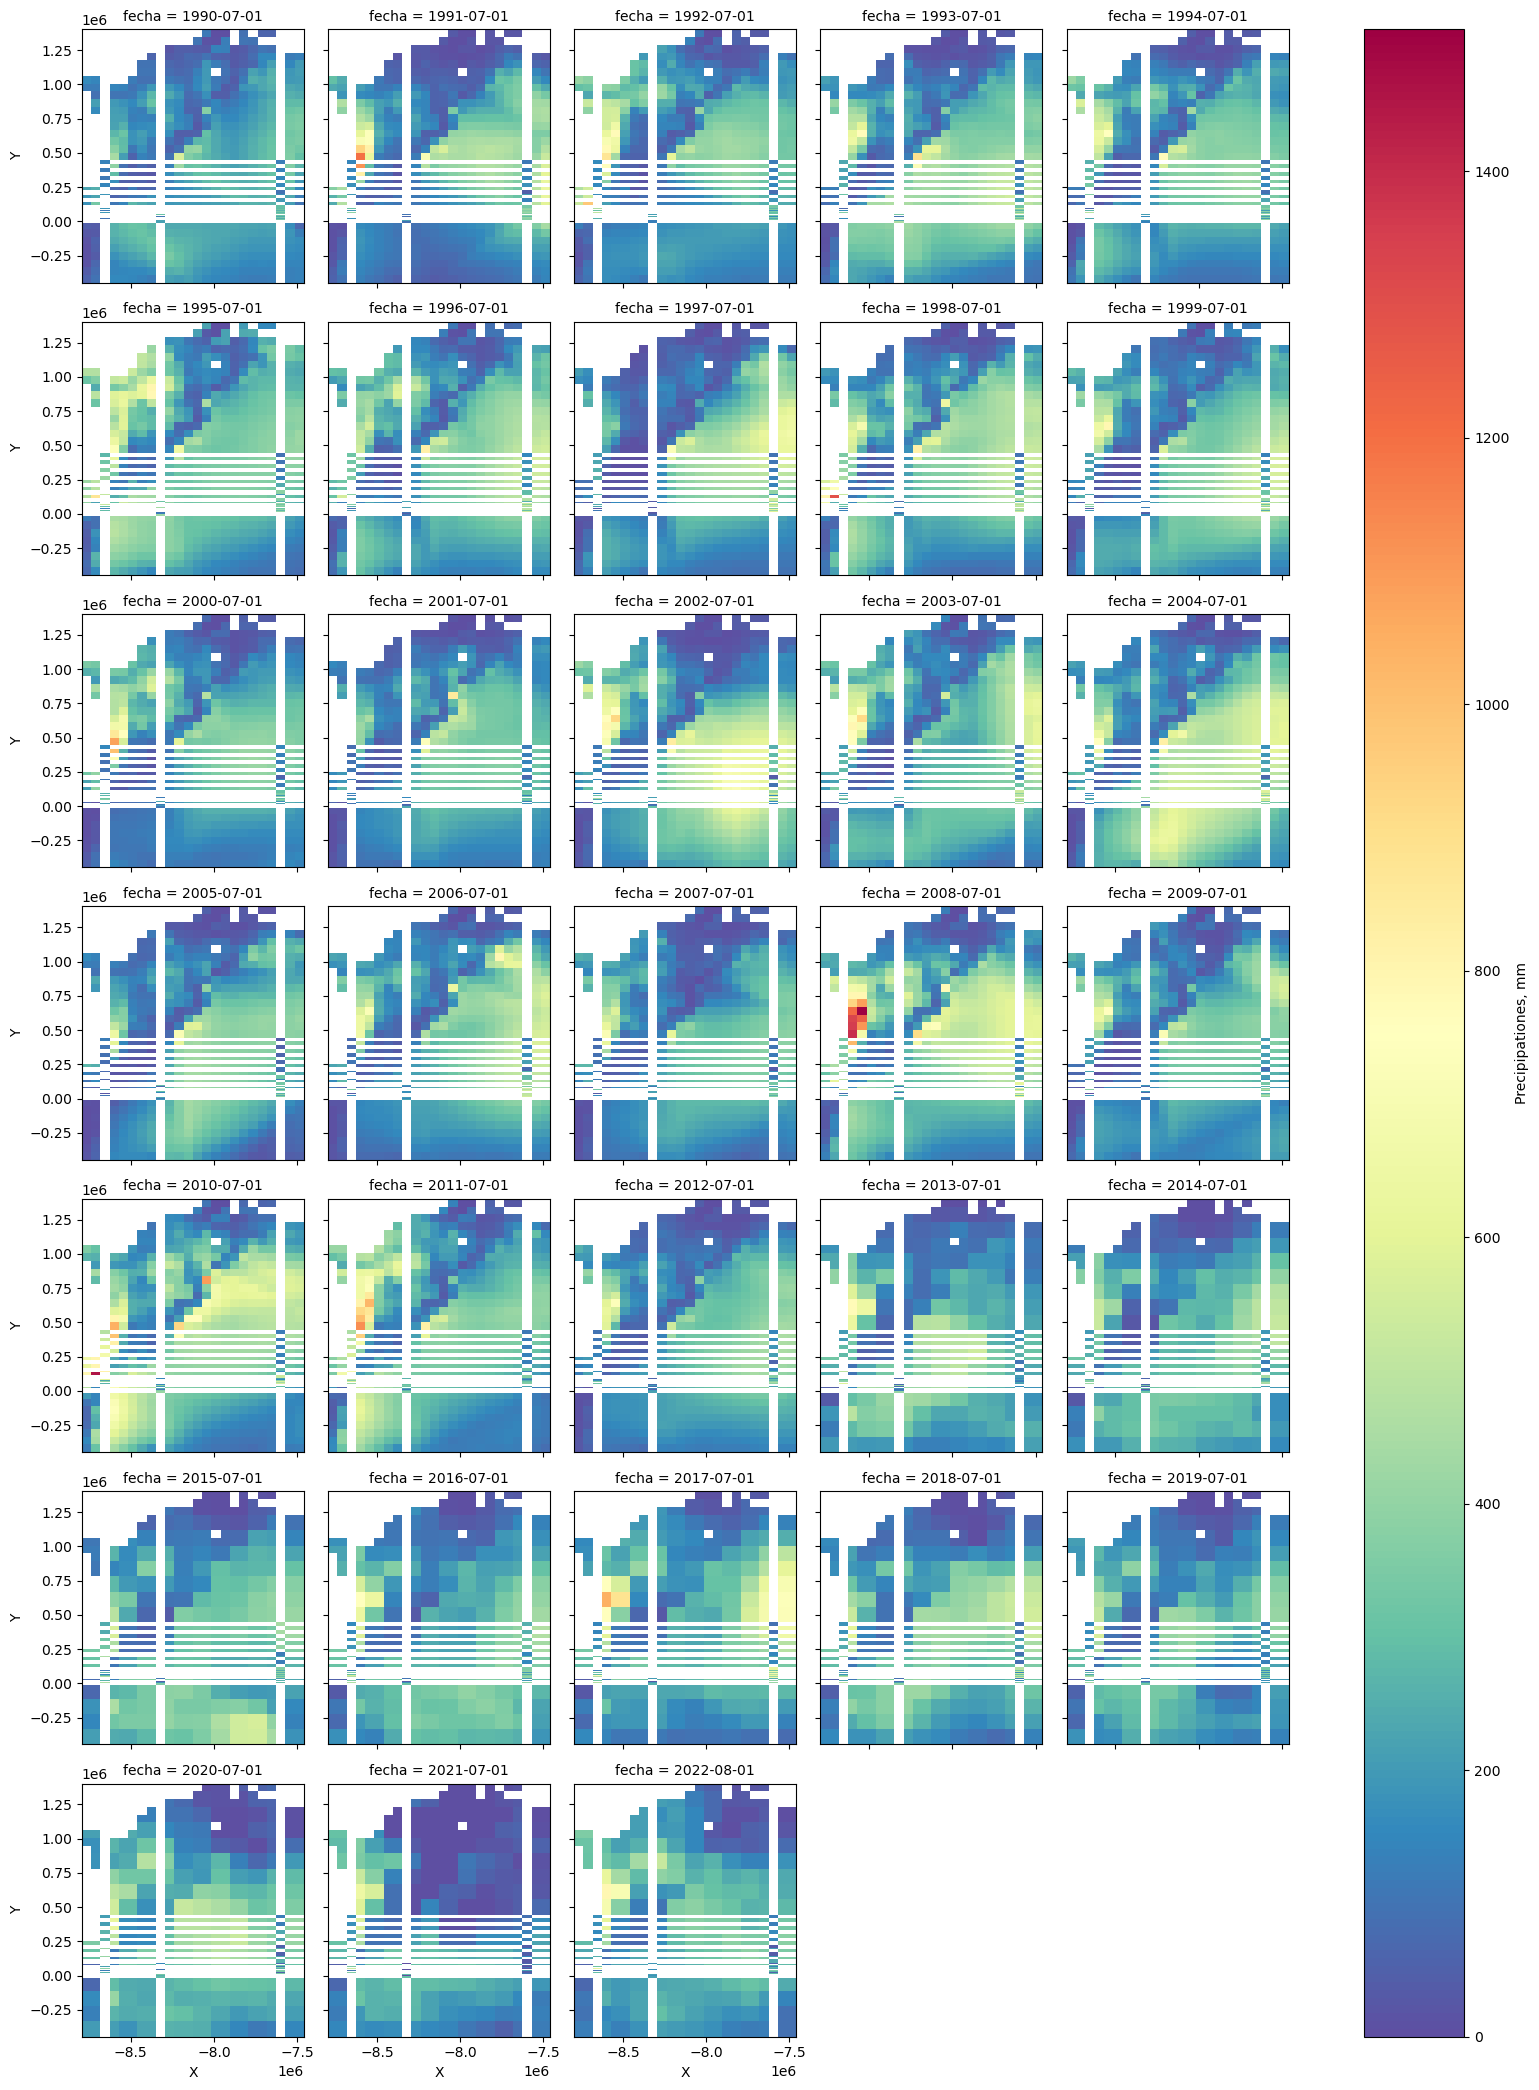

In [25]:
gri_lluvias = t.plot(x="X",y="Y", col="fecha", col_wrap=5, cmap="Spectral_r",cbar_kwargs={"label":"Precipipationes, mm"})

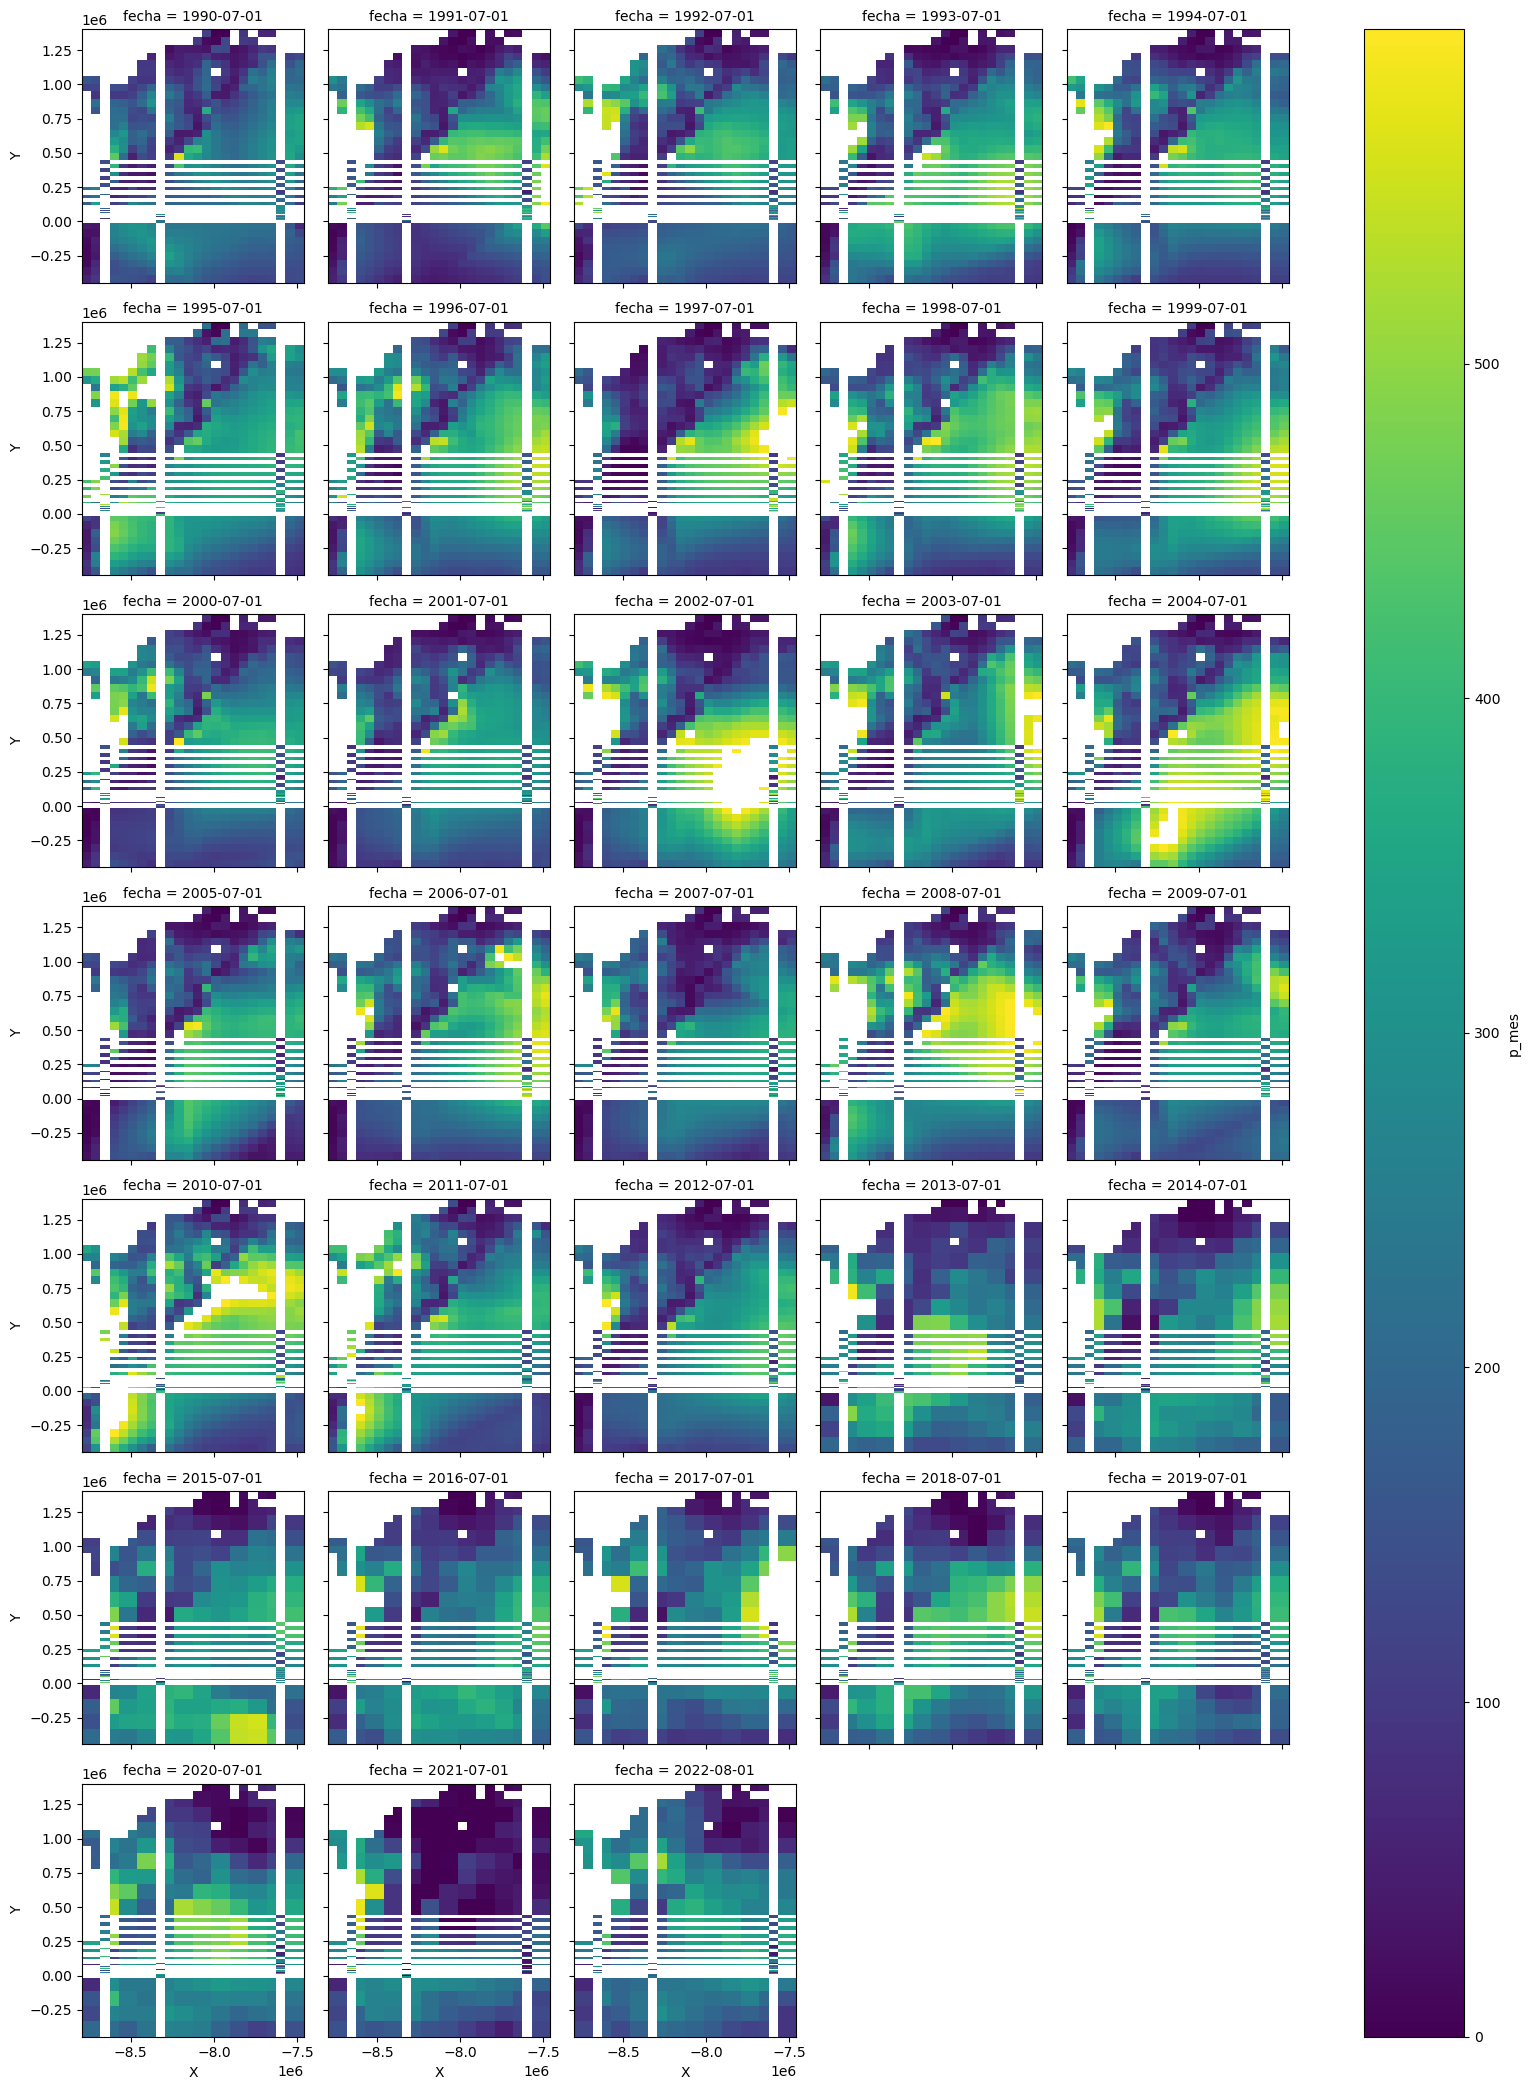

In [26]:
t.where(t<600).plot(x="X",y="Y",col="fecha", col_wrap=5)

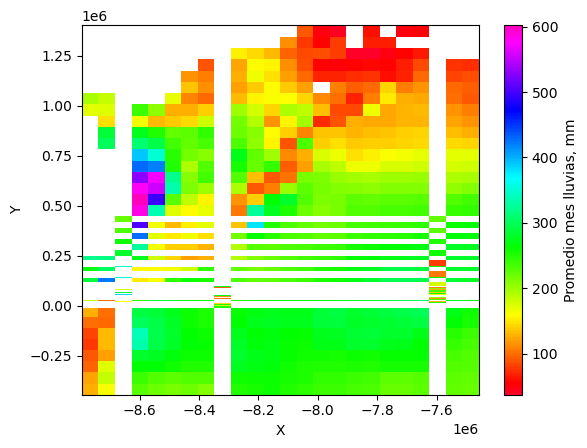

In [27]:
xr_lluvias.p_mes.mean(dim="fecha").plot(x="X",y="Y",cmap="gist_rainbow",cbar_kwargs={"label":"Promedio mes lluvias, mm"})

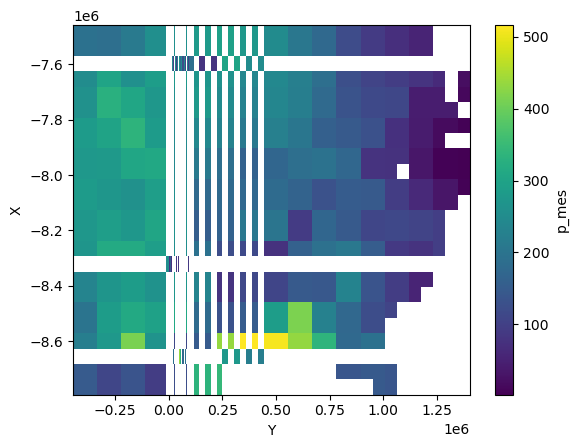

In [28]:
xr_lluvias.p_mes[300:312,:,:].mean(dim="fecha").plot()

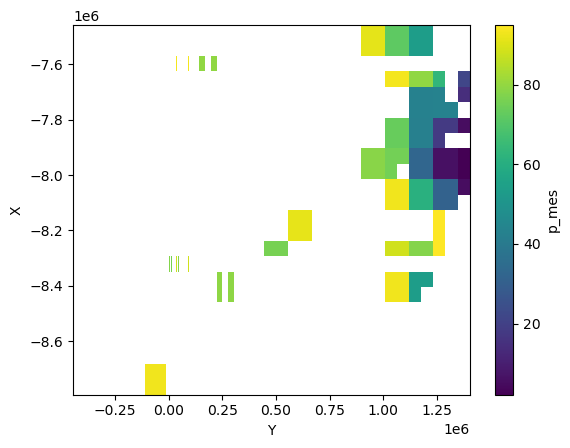

In [29]:
med100 = xr_lluvias.p_mes[300:312,:,:].mean(dim="fecha")
med100.where(med100<100).plot()